In [ ]:
# 파이썬 머신러닝 사이킷런 설치
%pip install -q scikit-learn
%pip install pandas
%pip install matplotlib
%pip install seaborn
%pip install sklearn

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import sklearn

print(sklearn.__version__)

1.5.1


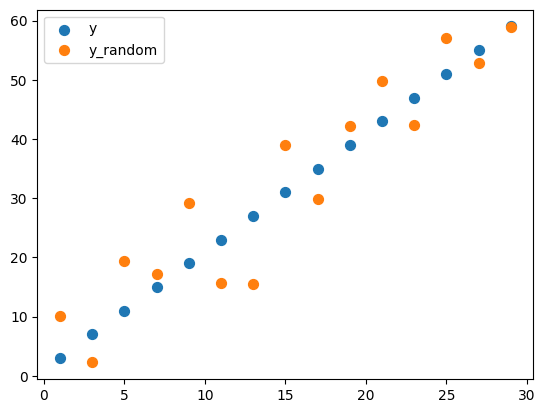

In [2]:
## 회귀분석
np.random.seed(910)
x = np.arange(1, 30, 2)
y = 2*x + 1 # coeff = 2, intercept = 1
y_random = y + np.random.normal(0, 8, len(y))

plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.legend()
plt.show()

In [3]:
x_mean = np.mean(x)
y_mean = np.mean(y_random)
Sxy = sum((x - x_mean)*(y_random - y_mean))
Sxx = sum((x - x_mean)**2)

b1 = Sxy/Sxx
b0 = y_mean - b1*x_mean

print("b1 = ", b1.round(3))
print("b0 = ", b0.round(3))

b1 =  1.901
b0 =  3.566


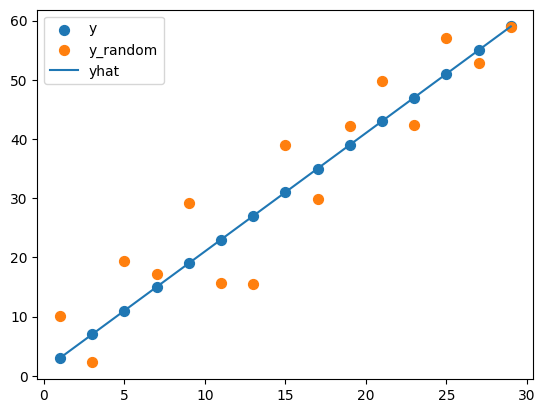

In [4]:
yhat = b1*x + b0

# np.random.seed(910)
# x = np.arange(1, 30, 2)
# y = 2*x + 1 # coeff = 2, intercept = 1
# y_random = y + np.random.normal(0, 8, len(y))

plt.scatter(x, y, s = 50, label = "y")
plt.scatter(x, y_random, s = 50, label = "y_random")
plt.plot(x, y, label = "yhat")
plt.legend()
plt.show()

In [5]:
##
from sklearn.linear_model import LinearRegression
# 이제부터는 데이터를 형식대로 2d로 바꿔줘야한다

In [6]:
x_2d = x.reshape(-1, 1)
# reshape()디멘전을 하나 늘려라 앞의 1은 그거에 따라 row도 확장하라는말 -1은 알아서 맞추라는것
# print(x)
# print(x_2d)
# print(x_2d.shape)
# print(x.shape)

In [7]:
## class instance
lr = LinearRegression() # 선형회귀 # 랜덤포레스트면 여기만 바꾼다
## fittin
lr.fit(x_2d, y_random)

LinearRegression()

In [8]:
## print
print("coeff = ", lr.coef_)
print("intercept = ", lr.intercept_)

coeff =  [1.90073609]
intercept =  3.566406385768893


In [9]:
## score /
lr.score(x_2d, y_random) # score은 뭐지 우리의 회귀모형은 전체데이터의 0.8979..%를 나타?낸다?
# R**2 = SSR/SST # 분류모델일때 스코어하면 어큐레 어쩌고 이런식으로 뜻이 달라진다?

0.8679805034799591

In [15]:
## 문제
'''cars 자료를 읽고 설면변수 speed와 반응변수 dist를 이용하여 회귀분석을 실시'''
'''이해도가 된다면 요약통계량이랑 그래프를 그리고 해석까지'''
cars_df = pd.read_csv("C:/Users/user/Desktop/SeSAC_code/01_Data_handling/ml_dataset/dataset/cars.csv") # "../dataset/cars.csv"
cars_df.head(10)

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Users/user/Desktop/SeSAC_code/01_Data_handling/ml_dataset/dataset/cars.csv'

In [11]:
## Summary statistic
# cars_df.describe()
print("Summary statistic : ")
print(cars_df.agg(["mean", "std", "median", "min", "max"]).round(3))

Summary statistic : 


NameError: name 'cars_df' is not defined

NameError: name 'cars_df' is not defined

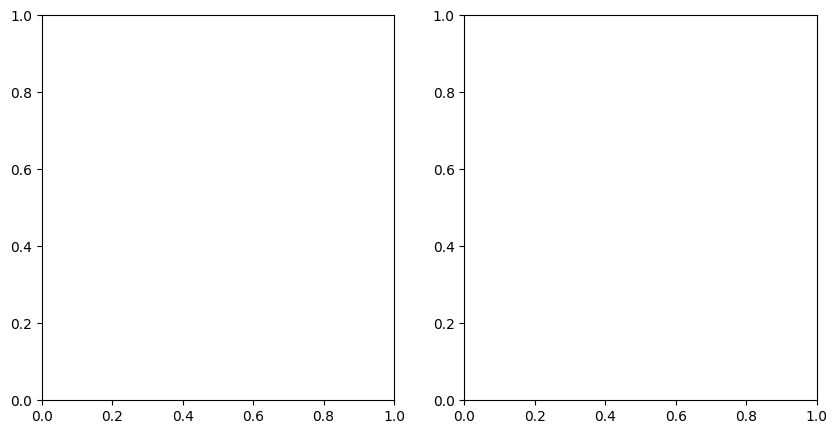

In [12]:
## Graph
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x = "speed", ax = axs[1], kde = True)
plt.show()

##
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.boxplot(cars_df, y = "dist", ax = axs[1])
plt.show()

In [13]:
lr = LinearRegression()
lr.fit(cars_df[["speed"]], cars_df["dist"]) # cars_df["speed"].values.reshape(-1,1)

NameError: name 'cars_df' is not defined

In [14]:
##
print("coeff = ", lr.coef_[0].round(3))     
print("intercept = ", lr.intercept_.round(3))

AttributeError: 'LinearRegression' object has no attribute 'coef_'

In [ ]:
##
print("R-squared = ", round(lr.score(cars_df[["speed"]], cars_df["dist"]), 3))

In [ ]:
##
x_line = np.linspace(5, 25, 10)

plt.scatter(x = "speed", y = "dist", data=cars_df, s = 100)
plt.plot(x_line, 3.932*x_line - 17.579, c = "r", label = "")
plt.legend()
plt.show()

In [ ]:
mtcars = pd.read_excel("C:/Users/user/Desktop/SeSAC_code/01_Data_handling/ml_dataset/dataset/mtcars.xlsx")
mtcars.head()
# 'cyl':'wt' 5개를 다중회귀분석한다.
# cyl: 엔진 실린더 수
# disp: 엔진의 배기량(부피)
# hp: 엔진의 출력(마력)
# drat: 리어 액슬의 기어 비율?
# wt: 차량무게(1천파운드)
# 독립변수5열이 종속변수(연비:mpg)에 미치는 영향을 다중회귀 분석

In [ ]:
x = mtcars[['cyl', 'disp', 'hp', 'drat', 'wt']]
y = mtcars['mpg']
print(x)
print(y)

In [ ]:
## Graph
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.histplot(cars_df, x = "dist", ax = axs[0], kde = True)
sns.histplot(cars_df, x = "speed", ax = axs[1], kde = True)
plt.show()

##
fig, axs = plt.subplots(1, 2, figsize = (10, 5))
sns.boxplot(cars_df, y = "speed", ax = axs[0])
sns.boxplot(cars_df, y = "dist", ax = axs[1])
plt.show()

In [ ]:
lr2 = LinearRegression()
lr2.fit(cars_df[["speed"]], cars_df["dist"]) # cars_df["speed"].values.reshape(-1,1)